In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df = pd.read_csv('./data/loan_checker/train_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
df.isnull().mean()

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [36]:
temp_df = df[['Gender','Self_Employed']]
temp_df.head()

,Gender,Self_Employed
0,Male,No
1,Male,No
2,Male,Yes
3,Male,No
4,Male,No


In [37]:
temp_df.isnull().mean()

Gender           0.021173
Self_Employed    0.052117
dtype: float64

In [38]:
t = df[df['Credit_History'].isnull()]
t.groupby(['Self_Employed'])['Self_Employed'].count()

Self_Employed
No     37
Yes     7
Name: Self_Employed, dtype: int64

In [39]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [40]:
print('Loan ID Unique : ', df['Loan_ID'].nunique())
print('Gender Unique : ', df['Gender'].nunique())
print('Married Unique : ', df['Married'].nunique())
print('Dependents Unique : ', df['Dependents'].nunique())
print('Education Unique : ', df['Education'].nunique())
print('Self_Employed Unique : ', df['Self_Employed'].nunique())
print('Property_Area Unique : ', df['Property_Area'].nunique())
print('Loan_Status Unique : ', df['Loan_Status'].nunique())

Loan ID Unique :  614
Gender Unique :  2
Married Unique :  2
Dependents Unique :  4
Education Unique :  2
Self_Employed Unique :  2
Property_Area Unique :  3
Loan_Status Unique :  2


All Cardinality Values are Low with Categorical Features.

In [47]:
temp_df = df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
temp_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


In [48]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

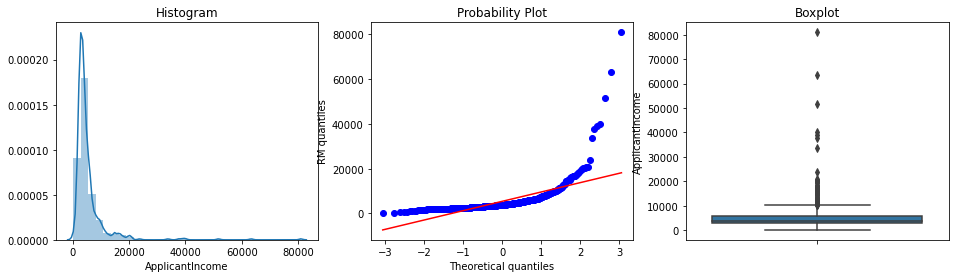

In [49]:
diagnostic_plots(temp_df, 'ApplicantIncome')

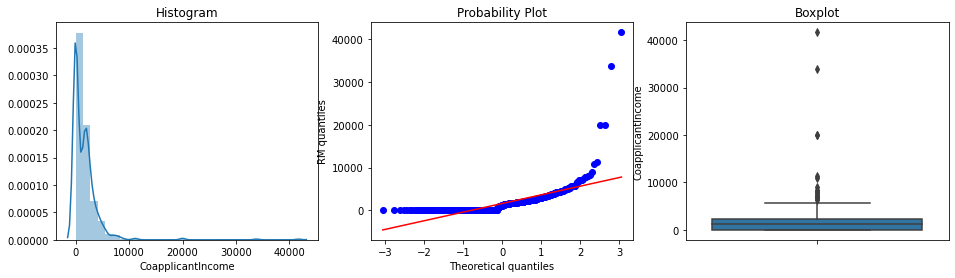

In [50]:
diagnostic_plots(temp_df, 'CoapplicantIncome')

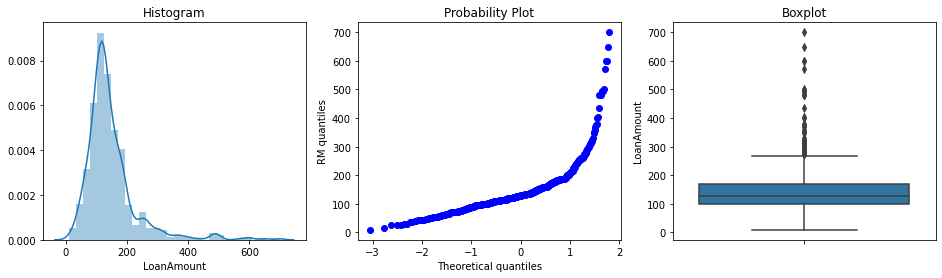

In [51]:
diagnostic_plots(temp_df, 'LoanAmount')

In [56]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [68]:
upper, lower = find_skewed_boundaries(temp_df, 'ApplicantIncome', 3)
upper, lower

(14547.5, -5875.0)

In [72]:
print('Total Loan Applicant : ', len(temp_df))
print('Applicant Income Bigger than 10172 : ', len(temp_df[temp_df['ApplicantIncome'] > upper]))
print('% of Applicant Income Bigger than 10172 : ', len(temp_df[temp_df['ApplicantIncome'] > upper]) / len(temp_df))

Total Loan Applicant :  614
Applicant Income Bigger than 10172 :  32
% of Applicant Income Bigger than 10172 :  0.05211726384364821


In [74]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0})

In [75]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [76]:
for col in ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']:
    print(col, 'range : ', df[col].max() - df[col].min())

ApplicantIncome range :  80850
CoapplicantIncome range :  41667.0
LoanAmount range :  691.0
Loan_Amount_Term range :  468.0
Credit_History range :  1.0


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score

In [113]:
temp_df = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']]

x_train, x_test, y_train, y_test = train_test_split(temp_df[['ApplicantIncome','CoapplicantIncome','LoanAmount', \
                                                            'Loan_Amount_Term','Credit_History']].fillna(0),
                                                    temp_df.Loan_Status,
                                                    test_size=0.3,
                                                    random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((429, 5), (185, 5), (429,), (185,))

In [114]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [115]:
print('Mean : ', x_train_scaled.mean(axis=0))
print('Std : ', x_train_scaled.std(axis=0))
print('Min : ', x_train_scaled.min(axis=0))
print('Max : ', x_train_scaled.max(axis=0))

Mean :  [0.06740489 0.03837401 0.20380952 0.69405594 0.75990676]
Std :  [0.08404831 0.07006318 0.13158386 0.17034582 0.42713988]
Min :  [0. 0. 0. 0. 0.]
Max :  [1. 1. 1. 1. 1.]


In [130]:
logit = LogisticRegression(random_state=44, C=1000, solver='lbfgs')
logit.fit(x_train, y_train)
pred = logit.predict(x_train)
print('Logistic Regression roc-auc : {}'.format(roc_auc_score(y_train,pred)))
pred1 = logit.predict(x_test)
print('Logistic Regression roc-auc : {}'.format(roc_auc_score(y_test,pred1)))

Logistic Regression roc-auc : 0.6784869976359338
Logistic Regression roc-auc : 0.6979806848112379


In [131]:
logit = LogisticRegression(random_state=44, C=1000, solver='lbfgs')
logit.fit(x_train_scaled, y_train)
pred = logit.predict(x_train_scaled)
print('Logistic Regression roc-auc : {}'.format(roc_auc_score(y_train,pred)))
pred1 = logit.predict(x_test_scaled)
print('Logistic Regression roc-auc : {}'.format(roc_auc_score(y_test,pred1)))

Logistic Regression roc-auc : 0.6979536052009456
Logistic Regression roc-auc : 0.7003219198127012


In [135]:
SVM_model = SVC(random_state=44, probability=True, gamma='auto')

#  train the model
SVM_model.fit(x_train, y_train)

# evaluate performance
print('Train set')
pred = SVM_model.predict_proba(x_train)
print('SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
print('Test set')
pred = SVM_model.predict_proba(x_test)
print('SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

Train set
SVM roc-auc: 1.0
Test set
SVM roc-auc: 0.5350453614281534


In [136]:
SVM_model = SVC(random_state=44, probability=True, gamma='auto')

#  train the model
SVM_model.fit(x_train_scaled, y_train)

# evaluate performance
print('Train set')
pred = SVM_model.predict_proba(x_train_scaled)
print('SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
print('Test set')
pred = SVM_model.predict_proba(x_test_scaled)
print('SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

Train set
SVM roc-auc: 0.7278368794326241
Test set
SVM roc-auc: 0.7045654082528534
